In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("data_cleaned.csv")

In [64]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'per_hour', 'employer_estimate',
       'glassdoor_estimate', 'min_salary', 'max_salary', 'mean_salary',
       'job_state', 'company_age', 'python_skill', 'spark_skill', 'aws_skill',
       'excel_skill'],
      dtype='object')

In [65]:
#Define some categories based on Job Title info
def job_split_categories(title):
    
    title = str(title)
    
    if "data scientist"   in title.lower(): return "data scientist"
    if "manager"          in title.lower(): return "manager"
    if "engineer"         in title.lower(): return "engineer"
    if "machine learning" in title.lower(): return "machine learning"
    if "analyst"          in title.lower(): return "analyst"
    if "director"          in title.lower(): return "director"
    
    return 'na'



def job_split_seniority(title):
    
    title = str(title)
    
    if  "sr" in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower(): 
        
        return "senior" 
       
    if "jr" in title.lower() or "junior" in title.lower() :
        
        return "junior"
           
    return 'na'

In [66]:
df["job_categories"] = df["Job Title"].apply(job_split_categories)

df["job_seniority"] = df["Job Title"].apply(job_split_seniority)

In [67]:
df.job_seniority.value_counts()


na        754
senior     67
junior     50
Name: job_seniority, dtype: int64

In [68]:
df.job_categories.value_counts()

data scientist      602
na                  207
machine learning     31
engineer             30
analyst               1
Name: job_categories, dtype: int64

In [69]:
df.job_state.unique().size

28

<AxesSubplot:>

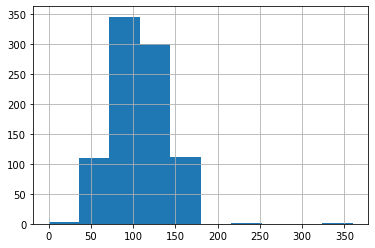

In [70]:
df.mean_salary.hist()

In [71]:
#Job Description Length
df["description_lenght"] = df["Job Description"].apply(lambda x: len(x))

df["description_lenght"]

0      697
1      807
2      938
3      858
4      318
      ... 
866      2
867      2
868      2
869      2
870      2
Name: description_lenght, Length: 871, dtype: int64

In [72]:
#Hourly wage to annual salary
df["min_salary"]  = df.apply(lambda x: x.min_salary  * 2   if x.per_hour == 1 else x.min_salary, axis = 1 )
df["max_salary"]  = df.apply(lambda x: x.max_salary  * 2   if x.per_hour == 1 else x.max_salary, axis = 1 )
df["mean_salary"] = df.apply(lambda x: x.mean_salary * 2   if x.per_hour == 1 else x.mean_salary,axis = 1 )


In [73]:
df.min_salary

0       81
1       52
2       54
3       75
4      102
      ... 
866     61
867     96
868     98
869     52
870     68
Name: min_salary, Length: 871, dtype: int64

In [74]:
df[df.per_hour == 1][["min_salary","max_salary"]]

,min_salary,max_salary
8,80,120
25,100,100
28,90,100
43,36,50
82,90,136
247,80,120
265,100,100
267,90,100
366,80,120
387,80,120


In [75]:
df["Company Name"]

0                              FullStory
1            California State University
2                              pulseData
3                              ClimateAI
4                        City of Chicago
                     ...                
866                                 ESPN
867                                Tesla
868                                Adobe
869      Zoom Video Communications, Inc.
870    Electric Power Research Institute
Name: Company Name, Length: 871, dtype: object

In [76]:
df.describe()

,Rating,per_hour,employer_estimate,glassdoor_estimate,min_salary,max_salary,mean_salary,company_age,python_skill,spark_skill,aws_skill,excel_skill,description_lenght
count,859.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,3.959837,0.032147,0.203215,0.794489,75.753157,142.944891,109.349024,31.748565,0.068886,0.004592,0.008037,0.051665,741.566016
std,0.738947,0.176492,0.402622,0.404307,23.222560,43.632285,31.553811,51.708866,0.253406,0.067650,0.089338,0.221476,1024.522727
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.800000,0.000000,0.000000,1.000000,61.000000,118.000000,91.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,4.100000,0.000000,0.000000,1.000000,79.000000,139.000000,107.000000,4.000000,0.000000,0.000000,0.000000,0.000000,524.000000
75%,4.300000,0.000000,0.000000,1.000000,92.000000,173.000000,130.500000,37.000000,0.000000,0.000000,0.000000,0.000000,1017.000000
max,5.000000,1.000000,1.000000,1.000000,336.000000,384.000000,360.000000,234.000000,1.000000,1.000000,1.000000,1.000000,5794.000000


<AxesSubplot:>

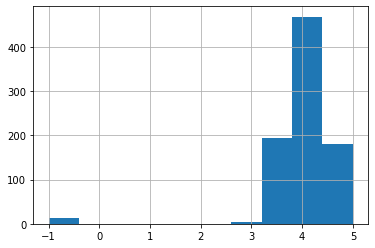

In [77]:
df.Rating.hist()

<AxesSubplot:>

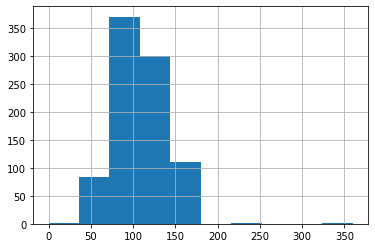

In [78]:
df.mean_salary.hist()

<AxesSubplot:>

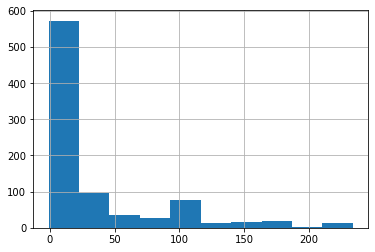

In [79]:
df.company_age.hist()

<AxesSubplot:>

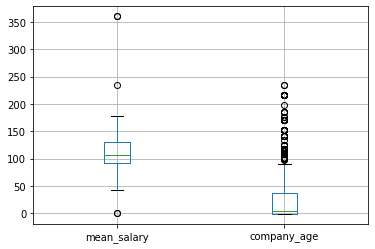

In [80]:
df.boxplot(column = ["mean_salary","company_age"] )

<AxesSubplot:>

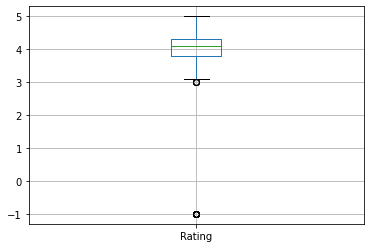

In [81]:
df.boxplot(column = "Rating")

In [82]:
corr_data = df[["company_age","mean_salary","Rating","description_lenght"]].corr()

<AxesSubplot:>

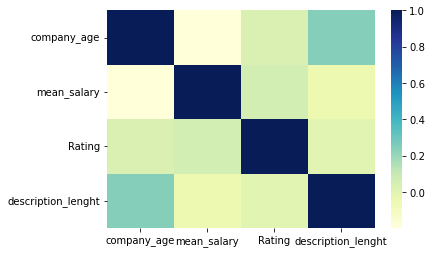

In [83]:
 sns.heatmap(corr_data, cmap="YlGnBu")

Graph for Location - Num Categories: 20


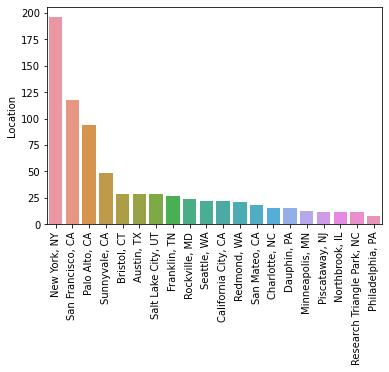

Graph for job_state - Num Categories: 20


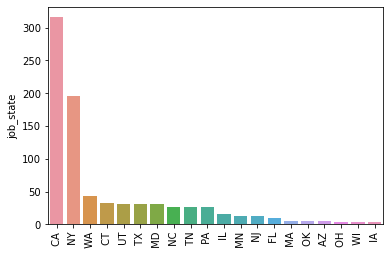

Graph for Company Name - Num Categories: 20


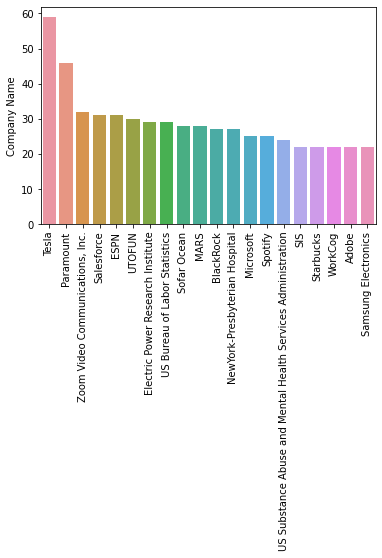

Graph for Type of ownership - Num Categories: 13


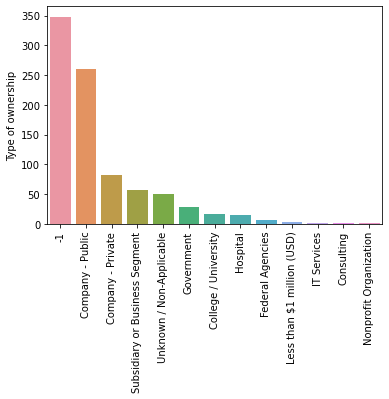

Graph for Industry - Num Categories: 20


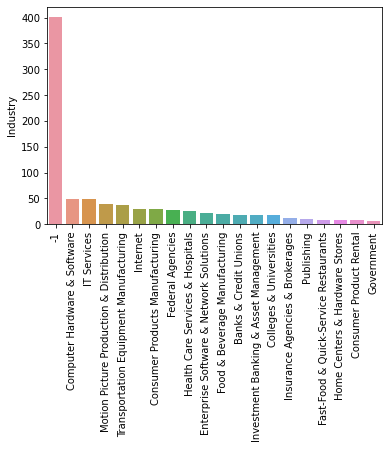

Graph for job_seniority - Num Categories: 3


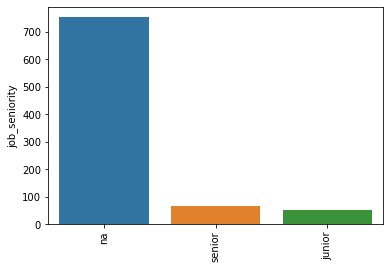

Graph for job_categories - Num Categories: 5


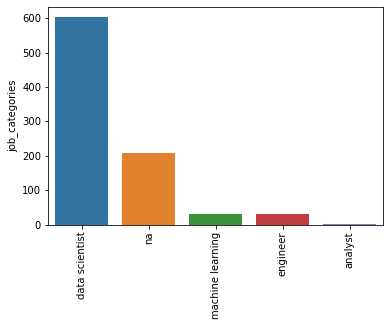

In [84]:
df_categorical = df[['Location','job_state','Company Name','Type of ownership','Industry', 
                                                         'job_seniority','job_categories']]

for i in df_categorical.columns:
    column_values = df_categorical[i].value_counts()[:20]
    print ("Graph for %s - Num Categories: %d" %(i, len(column_values)))
    chart = sns.barplot(x = column_values.index, y = column_values)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()
    

In [61]:
pd.pivot_table(df, index = ["job_categories","job_seniority"], values = "mean_salary")

mean_salary
job_categories job_seniority             
analyst        na               43.000000
data scientist junior          103.270000
               na              109.441237
               senior          139.947761
engineer       na              151.700000
mle            na              134.193548
na             na               91.159420

In [87]:
pd.pivot_table(df, index = ["job_state"], values = "mean_salary").sort_values("mean_salary", ascending = False)

,mean_salary
job_state,
MI,360.000000
CA,128.669304
WA,128.290698
OR,119.000000
IL,117.656250
DC,116.500000
MO,115.500000
MD,111.564516
IN,109.000000
